# Introduction
In this project I researched the affect of subclass imbalance on model mispredictions.
In the phenomena, also called Hidden Stratification,  the class of data is composed of multiple subclasses,
each with a slightly different distribution.
When the subclasses are not balanced, the model will be biased towards the majority subclass,
and will mispredict the minority subclass.

# Data
The data used in this project is:
1. The [Adult Census Income](https://archive.ics.uci.edu/ml/datasets/Adult) dataset.
2. The [Bank Marketing](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing) dataset.
3. The [Heart Disease](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) dataset.
4. The [German Credit](https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29) dataset.


# imports

In [1]:
%matplotlib inline

from configs.expriment_config import DatasetNames, InputMode, ClusteringMethods, EvaluationMethods, Config
from plots.plot_results import plot_classes_exp_results
from plotter import get_plots_path, show_pngs, get_available_experiments
from runner import run_exp
from training.train_model import main

I test the clustering in 2 different spaces:
1. The input space - The data after it was preprocessed.
2. The feature space - The data after it was passed through a trained model.

To do this I train a model on the entire train set.


In [ ]:
# [DatasetNames.ADULT, DatasetNames.BANK, DatasetNames.HEART, DatasetNames.CREDIT]
dataset_name = DatasetNames.ADULT
main(dataset_name)

### A sample of code to run an experiment.

The experiment can be stopped after the clustering, of perform training
on the train data with different balancing of the cluster, to show the effect of the cluster
imbalance on the model performance.<br/>

Choose the clustering space: [InputMode.FEATURES, InputMode.INPUTS]<br/>
Choose the dataset: [DatasetNames.ADULT, DatasetNames.BANK, DatasetNames.HEART, DatasetNames.CREDIT]<br/>
Choose the clustering method:<br/>
[ClusteringMethods.DBSCAN, ClusteringMethods.KMEANS, ClusteringMethods.BIRCH,
ClusteringMethods.OPTICS, ClusteringMethods.GAUSSIANMIXTURE]<br/>
Choose the evaluation method: [EvaluationMethods.PRECISION, EvaluationMethods.RECALL, EvaluationMethods.F1]

To stop the experiment after the clustering, set stop_after_clustering = True.

The experiment name is created from the parameters and must be unique for each experiment.<br/>
To run the same experiment again, change the experiment name.

In [ ]:
input_mode = InputMode.FEATURES
dataset_name = DatasetNames.ADULT
clustering_method = ClusteringMethods.KMEANS
eval_method = EvaluationMethods.PRECISION
stop_after_clustering = False

experiment_name = f'{dataset_name.get_value()}_{input_mode.get_value()}_{clustering_method.get_value()}_{eval_method.get_value()}{"_only_cluster" if stop_after_clustering else ""}'
print(f'Running experiment: {experiment_name}')
config = Config(experiment_name=experiment_name,
                input_mode=input_mode,
                dataset_name=dataset_name,
                clustering_method=clustering_method,
                eval_method=eval_method,
                stop_after_clustering=stop_after_clustering)
try:
    run_exp(config)        
except Exception as e:
    print(e)

After the experiment is done, running the plot code will save plots of the results and show them.<br/>
An experiment that did not run this function is not complete, and the plots won't be diplayed.

In [ ]:
plot_classes_exp_results(config)

Available experiments:

In [10]:
experiments = get_available_experiments()
print(experiments)

['adult_features_birch_precision_only_cluster', 'adult_features_dbscan_precision', 'adult_features_dbscan_precision_only_cluster', 'adult_features_gaussianmixture_precision_only_cluster', 'adult_features_kmeans_precision', 'adult_features_kmeans_precision_only_cluster', 'adult_features_optics_precision_only_cluster', 'adult_inputs_dbscan_precision', 'adult_inputs_kmeans_precision']


set the experiment name to the name of the experiment you want to plot.

In [11]:
experiment_name = 'adult_features_kmeans_precision' # change this to the name of the experiment you want to plot

Choose which class results to plot: [0 / 1]


In [12]:
class_num = 1 # change this to the class you want to plot

There are 3 plots for each class in the experiment (2 if stop_after_clustering = True):
1. The cluster sizes and divergence plot - Shows the divergence of each cluster
performance from the performance of the model on the entire class - both in the train and test sets.
2. The cluster t-SNE plot - Shows the t-SNE projection of the data in the clusters in the clustering space.
3. The cluster imbalance plot - after performing training on the train data with different balancing of the cluster,
shows the effect of the cluster imbalance on the model performance.

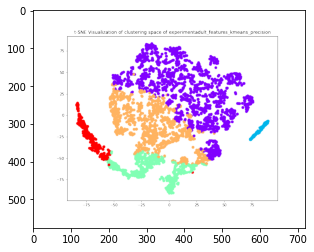

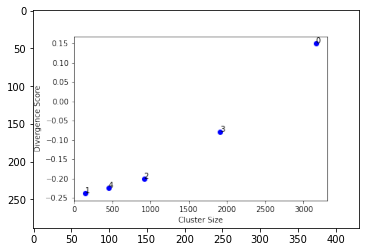

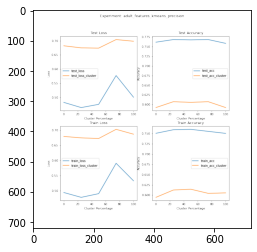

In [18]:
png_paths = get_plots_path(experiment_name, class_num)
show_pngs(png_paths)